<a href="https://colab.research.google.com/github/samyon7/50_Calculating_the_Winner/blob/master/Predict_the_EmployeeBurnOutRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Predict the employee burn out rate</b><br>
--
AUTHOR : HAMORA HADI

World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise an awareness about mental health issues around the world and mobilise efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide.
You are a Machine Learning engineer in a company. You are given a task to understand and observe the mental health of all the employees in your company. Therefore, you are required to predict the burn out rate of employees based on the provided features thus helping the company to take appropriate measures for their employees.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
train_dataset = pd.read_csv('train.csv')
test_dataset  = pd.read_csv('test.csv')

train_dataset.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3.0,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2.0,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3.0,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3.0,6.0,NaN,0.67


In [175]:
test_dataset.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
5,fffe3600390032003200,2008-09-19,Male,Product,No,3.0,5.0,6.5
6,fffe3600370032003200,2008-01-16,Female,Service,Yes,2.0,3.0,4.7
7,fffe32003900390030003000,2008-02-10,Male,Service,No,2.0,5.0,8.5
8,fffe3100370031003000,2008-08-10,Male,Product,Yes,2.0,5.0,7.6
9,fffe31003500320037003600,2008-05-20,Male,Product,Yes,2.0,5.0,5.7


In [176]:
len(train_dataset)

22750

In [177]:
len(test_dataset)

12250

In [178]:
train_dataset.info

<bound method DataFrame.info of                     Employee ID  ... Burn Rate
0      fffe32003000360033003200  ...      0.16
1          fffe3700360033003500  ...      0.36
2      fffe31003300320037003900  ...      0.49
3      fffe32003400380032003900  ...      0.20
4      fffe31003900340031003600  ...      0.52
...                         ...  ...       ...
22745  fffe31003500370039003100  ...      0.41
22746  fffe33003000350031003800  ...      0.59
22747          fffe390032003000  ...      0.72
22748  fffe33003300320036003900  ...      0.52
22749      fffe3400350031003800  ...      0.61

[22750 rows x 9 columns]>

In [179]:
train_dataset=(train_dataset[train_dataset['Burn Rate'].notnull()])
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           21626 non-null  object 
 1   Date of Joining       21626 non-null  object 
 2   Gender                21626 non-null  object 
 3   Company Type          21626 non-null  object 
 4   WFH Setup Available   21626 non-null  object 
 5   Designation           21626 non-null  float64
 6   Resource Allocation   20348 non-null  float64
 7   Mental Fatigue Score  19681 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [180]:
train_dataset['Resource Allocation'].value_counts()

4.0     3694
5.0     3670
3.0     3028
6.0     2817
2.0     1988
7.0     1880
1.0     1701
8.0      992
9.0      428
10.0     150
Name: Resource Allocation, dtype: int64

In [181]:
VALUE = train_dataset['Resource Allocation'].fillna(train_dataset['Resource Allocation'].median())
len(VALUE), VALUE[0], train_dataset['Resource Allocation'].median()

(21626, 3.0, 4.0)

In [182]:
train_dataset = train_dataset.drop('Resource Allocation',axis=1)
print(train_dataset.shape)

(21626, 8)


In [183]:
train_dataset['Resource Allocation'] = VALUE
train_dataset.shape

(21626, 9)

In [184]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           21626 non-null  object 
 1   Date of Joining       21626 non-null  object 
 2   Gender                21626 non-null  object 
 3   Company Type          21626 non-null  object 
 4   WFH Setup Available   21626 non-null  object 
 5   Designation           21626 non-null  float64
 6   Mental Fatigue Score  19681 non-null  float64
 7   Burn Rate             21626 non-null  float64
 8   Resource Allocation   21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.3+ MB


In [185]:
train_dataset = train_dataset.drop('Employee ID',axis=1)
train_dataset.shape

(21626, 8)

VISUALIZE!

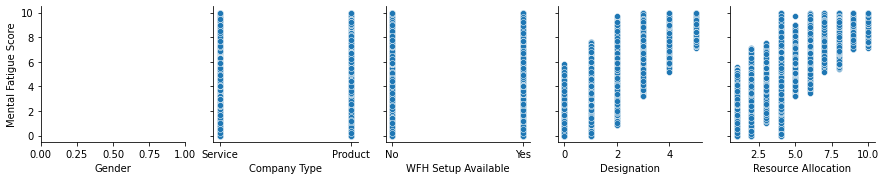

In [186]:
pp = sns.pairplot(data=train_dataset,
                  y_vars=['Mental Fatigue Score'],
                  x_vars=['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation'])

In [187]:
X1 = np.array(train_dataset['Designation'])
X2 = np.array(train_dataset['Resource Allocation'])
Y = np.array(train_dataset['Mental Fatigue Score'])

X1_test = X1[np.isnan(Y)]
X2_test = X2[np.isnan(Y)]

print(type(X1_test), X1_test.shape)

<class 'numpy.ndarray'> (1945,)


In [188]:
Y_train = Y[~np.isnan(Y)]
X1_train = X1[~np.isnan(Y)]
X2_train = X2[~np.isnan(Y)]

print(type(Y_train), Y_train.shape)

<class 'numpy.ndarray'> (19681,)


In [189]:
# Total is -> X1_test.shape + Y_train.shape
1945 + 19681

21626

In [190]:
X_train = pd.DataFrame({"X1":X1_train,"X2": X2_train})
X_test = pd.DataFrame({"X1":X1_test,"X2":X2_test})

Y_train = pd.Series(Y_train)

In [191]:
# Use Linear regression!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_x,validation_x,train_y,validation_y = train_test_split(X_train,Y_train,test_size=0.20,random_state=0)

train_x.head(10)

,X1,X2
19254,2.0,5.0
12305,3.0,6.0
11949,2.0,3.0
18750,2.0,2.0
15510,3.0,4.0
16753,4.0,9.0
15248,3.0,5.0
17012,2.0,3.0
11136,2.0,3.0
387,2.0,5.0


In [192]:
validation_x.head(10)

,X1,X2
18558,4.0,6.0
11386,2.0,4.0
11441,2.0,2.0
14682,2.0,6.0
12177,3.0,5.0
6016,2.0,4.0
6935,2.0,4.0
6161,1.0,4.0
19054,4.0,7.0
6046,3.0,5.0


In [193]:
validation_y.head(10)

18558    8.0
11386    5.7
11441    3.6
14682    6.8
12177    5.2
6016     2.7
6935     4.7
6161     5.2
19054    6.8
6046     7.4
dtype: float64

In [194]:
# Define with model 1!
model1 = LinearRegression()
model1.fit(train_x,train_y)

predict_y = model1.predict(validation_x)

In [195]:
# Now, we use MSE!
from sklearn.metrics import mean_squared_error
mean_squared_error(validation_y,predict_y)

1.401709179947401

In [196]:
actul_prediction = model1.predict(X_test)
print(actul_prediction.shape)
print(type(actul_prediction))
print(train_dataset.keys())

(1945,)
<class 'numpy.ndarray'>
Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Mental Fatigue Score', 'Burn Rate',
       'Resource Allocation'],
      dtype='object')


In [197]:
print(train_dataset['Mental Fatigue Score'].head(10))

0    3.8
1    5.0
2    5.8
3    2.6
4    6.9
5    3.6
6    7.9
7    4.4
8    NaN
9    NaN
Name: Mental Fatigue Score, dtype: float64


In [198]:
print(train_dataset[train_dataset['Mental Fatigue Score'].isnull()].shape)

(1945, 8)


In [199]:
actul_prediction.shape

(1945,)

In [200]:
actul_prediction = pd.Series(actul_prediction)
train_dataset.loc[:,'Mental Fatigue Score'].head(10)

0    3.8
1    5.0
2    5.8
3    2.6
4    6.9
5    3.6
6    7.9
7    4.4
8    NaN
9    NaN
Name: Mental Fatigue Score, dtype: float64

In [201]:
import math
MENTAL_LIST=[]
j=0
actul_prediction = list(actul_prediction)
for i in list(train_dataset['Mental Fatigue Score']):
    if(math.isnan(i)):
        MENTAL_LIST.append(round(actul_prediction[j],2))
        j += 1
    else:
        MENTAL_LIST.append(i)

In [202]:
print(j)
print(len(MENTAL_LIST))
print(len(train_dataset['Mental Fatigue Score']))

1945
21626
21626


In [203]:
print(train_dataset['Mental Fatigue Score'].head(15))

0     3.8
1     5.0
2     5.8
3     2.6
4     6.9
5     3.6
6     7.9
7     4.4
8     NaN
9     NaN
10    5.3
11    1.8
12    NaN
13    NaN
14    5.8
Name: Mental Fatigue Score, dtype: float64


In [204]:
for i in MENTAL_LIST:
    if(math.isnan(i)):
        print(True)

train_dataset = train_dataset.drop('Mental Fatigue Score',axis=1)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date of Joining      21626 non-null  object 
 1   Gender               21626 non-null  object 
 2   Company Type         21626 non-null  object 
 3   WFH Setup Available  21626 non-null  object 
 4   Designation          21626 non-null  float64
 5   Burn Rate            21626 non-null  float64
 6   Resource Allocation  21626 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.9+ MB


In [205]:
MENTAL_SERIES=pd.Series(MENTAL_LIST)
len(MENTAL_SERIES)

21626

In [206]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date of Joining      21626 non-null  object 
 1   Gender               21626 non-null  object 
 2   Company Type         21626 non-null  object 
 3   WFH Setup Available  21626 non-null  object 
 4   Designation          21626 non-null  float64
 5   Burn Rate            21626 non-null  float64
 6   Resource Allocation  21626 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.9+ MB


In [207]:
df2 = pd.DataFrame({"Mental Fatigue Score": MENTAL_SERIES})
train_dataset.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

train = pd.concat([train_dataset, df2], axis=1)
train.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score
0,2008-09-30,Female,Service,No,2.0,0.16,3.0,3.80
1,2008-11-30,Male,Service,Yes,1.0,0.36,2.0,5.00
2,2008-03-10,Female,Product,Yes,2.0,0.49,4.0,5.80
3,2008-11-03,Male,Service,Yes,1.0,0.20,1.0,2.60
4,2008-07-24,Female,Service,No,3.0,0.52,7.0,6.90
5,2008-11-26,Male,Product,Yes,2.0,0.29,4.0,3.60
6,2008-01-02,Female,Service,No,3.0,0.62,6.0,7.90
7,2008-10-31,Female,Service,Yes,2.0,0.33,4.0,4.40
8,2008-12-27,Female,Service,No,3.0,0.56,6.0,6.89
9,2008-03-09,Female,Product,No,3.0,0.67,6.0,6.89


In [208]:
train.isnull().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Burn Rate               0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

<b>Step 1 is done!</b><br>
Now we go to data handling!

In [209]:
train.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score
0,2008-09-30,Female,Service,No,2.0,0.16,3.0,3.80
1,2008-11-30,Male,Service,Yes,1.0,0.36,2.0,5.00
2,2008-03-10,Female,Product,Yes,2.0,0.49,4.0,5.80
3,2008-11-03,Male,Service,Yes,1.0,0.20,1.0,2.60
4,2008-07-24,Female,Service,No,3.0,0.52,7.0,6.90
5,2008-11-26,Male,Product,Yes,2.0,0.29,4.0,3.60
6,2008-01-02,Female,Service,No,3.0,0.62,6.0,7.90
7,2008-10-31,Female,Service,Yes,2.0,0.33,4.0,4.40
8,2008-12-27,Female,Service,No,3.0,0.56,6.0,6.89
9,2008-03-09,Female,Product,No,3.0,0.67,6.0,6.89


In [210]:
import time
from datetime import date

def get_experience(joining_date):
    today = date.today()
    joinTimeStruct = time.strptime(joining_date,"%Y-%m-%d")
    todayTimeStruct = time.strptime(str(today),"%Y-%m-%d")
    year = todayTimeStruct.tm_year - joinTimeStruct.tm_year
    month = todayTimeStruct.tm_mon - joinTimeStruct.tm_mon
    if(todayTimeStruct.tm_mon<joinTimeStruct.tm_mon):
        month = month%12
        year -= 1
    return round(year+month/12,2)

get_experience(train['Date of Joining'][0])

12.17

In [211]:
Experience = pd.Series([get_experience(i) for i in train['Date of Joining']])
print(Experience[0:5])

0    12.17
1    12.00
2    12.67
3    12.00
4    12.33
dtype: float64


In [212]:
train['Experience'] = Experience
train.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience
0,2008-09-30,Female,Service,No,2.0,0.16,3.0,3.80,12.17
1,2008-11-30,Male,Service,Yes,1.0,0.36,2.0,5.00,12.00
2,2008-03-10,Female,Product,Yes,2.0,0.49,4.0,5.80,12.67
3,2008-11-03,Male,Service,Yes,1.0,0.20,1.0,2.60,12.00
4,2008-07-24,Female,Service,No,3.0,0.52,7.0,6.90,12.33
5,2008-11-26,Male,Product,Yes,2.0,0.29,4.0,3.60,12.00
6,2008-01-02,Female,Service,No,3.0,0.62,6.0,7.90,12.83
7,2008-10-31,Female,Service,Yes,2.0,0.33,4.0,4.40,12.08
8,2008-12-27,Female,Service,No,3.0,0.56,6.0,6.89,11.92
9,2008-03-09,Female,Product,No,3.0,0.67,6.0,6.89,12.67


In [213]:
train = train.drop('Date of Joining',axis=1)
train.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Burn Rate               0
Resource Allocation     0
Mental Fatigue Score    0
Experience              0
dtype: int64

In [214]:
# This algorithm is for test data!
test_dataset.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
5,fffe3600390032003200,2008-09-19,Male,Product,No,3.0,5.0,6.5
6,fffe3600370032003200,2008-01-16,Female,Service,Yes,2.0,3.0,4.7
7,fffe32003900390030003000,2008-02-10,Male,Service,No,2.0,5.0,8.5
8,fffe3100370031003000,2008-08-10,Male,Product,Yes,2.0,5.0,7.6
9,fffe31003500320037003600,2008-05-20,Male,Product,Yes,2.0,5.0,5.7


In [215]:
test_dataset.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

NO NULL!

In [216]:
Test_Employee_ID = test_dataset['Employee ID']
test_dataset = test_dataset.drop('Employee ID',axis=1)

for i in test_dataset['Date of Joining']:
    print(i)
    if i=='2008-08-14':
        break

2008-12-10
2008-08-14


In [217]:
TEST_EXPERIENCE = [get_experience(i) for i in test_dataset['Date of Joining']]
TEST_EXPERIENCE = pd.Series(TEST_EXPERIENCE)

test_dataset['Experience'] = TEST_EXPERIENCE

test_dataset.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Experience
0,2008-12-10,Female,Service,No,2.0,5.0,7.7,11.92
1,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,12.25
2,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,12.00
3,2008-02-07,Female,Service,No,3.0,6.0,4.6,12.75
4,2008-07-17,Female,Product,No,2.0,5.0,6.4,12.33
5,2008-09-19,Male,Product,No,3.0,5.0,6.5,12.17
6,2008-01-16,Female,Service,Yes,2.0,3.0,4.7,12.83
7,2008-02-10,Male,Service,No,2.0,5.0,8.5,12.75
8,2008-08-10,Male,Product,Yes,2.0,5.0,7.6,12.25
9,2008-05-20,Male,Product,Yes,2.0,5.0,5.7,12.50


In [218]:
test_dataset = test_dataset.drop('Date of Joining',axis=1) # For categorical data handling!
test_dataset.head(10)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Experience
0,Female,Service,No,2.0,5.0,7.7,11.92
1,Female,Product,Yes,1.0,2.0,5.2,12.25
2,Male,Product,Yes,1.0,3.0,5.9,12.00
3,Female,Service,No,3.0,6.0,4.6,12.75
4,Female,Product,No,2.0,5.0,6.4,12.33
5,Male,Product,No,3.0,5.0,6.5,12.17
6,Female,Service,Yes,2.0,3.0,4.7,12.83
7,Male,Service,No,2.0,5.0,8.5,12.75
8,Male,Product,Yes,2.0,5.0,7.6,12.25
9,Male,Product,Yes,2.0,5.0,5.7,12.50


In [219]:
train_dummy_gender = pd.get_dummies(train['Gender'])
train = pd.concat([train,train_dummy_gender],axis=1)

train.head(10)

,Gender,Company Type,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male
0,Female,Service,No,2.0,0.16,3.0,3.80,12.17,1,0
1,Male,Service,Yes,1.0,0.36,2.0,5.00,12.00,0,1
2,Female,Product,Yes,2.0,0.49,4.0,5.80,12.67,1,0
3,Male,Service,Yes,1.0,0.20,1.0,2.60,12.00,0,1
4,Female,Service,No,3.0,0.52,7.0,6.90,12.33,1,0
5,Male,Product,Yes,2.0,0.29,4.0,3.60,12.00,0,1
6,Female,Service,No,3.0,0.62,6.0,7.90,12.83,1,0
7,Female,Service,Yes,2.0,0.33,4.0,4.40,12.08,1,0
8,Female,Service,No,3.0,0.56,6.0,6.89,11.92,1,0
9,Female,Product,No,3.0,0.67,6.0,6.89,12.67,1,0


In [220]:
train = train.drop('Gender',axis=1)
train_company_type = pd.get_dummies(train['Company Type'])

train = pd.concat([train,train_company_type],axis=1)
train = train.drop('Company Type',axis=1)
train.head(10)

,WFH Setup Available,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service
0,No,2.0,0.16,3.0,3.80,12.17,1,0,0,1
1,Yes,1.0,0.36,2.0,5.00,12.00,0,1,0,1
2,Yes,2.0,0.49,4.0,5.80,12.67,1,0,1,0
3,Yes,1.0,0.20,1.0,2.60,12.00,0,1,0,1
4,No,3.0,0.52,7.0,6.90,12.33,1,0,0,1
5,Yes,2.0,0.29,4.0,3.60,12.00,0,1,1,0
6,No,3.0,0.62,6.0,7.90,12.83,1,0,0,1
7,Yes,2.0,0.33,4.0,4.40,12.08,1,0,0,1
8,No,3.0,0.56,6.0,6.89,11.92,1,0,0,1
9,No,3.0,0.67,6.0,6.89,12.67,1,0,1,0


In [221]:
train_WFH = pd.get_dummies(train['WFH Setup Available'])
train = pd.concat([train,train_WFH],axis=1)
train = train.drop('WFH Setup Available', axis=1)

train.head(10)

,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,0.16,3.0,3.80,12.17,1,0,0,1,1,0
1,1.0,0.36,2.0,5.00,12.00,0,1,0,1,0,1
2,2.0,0.49,4.0,5.80,12.67,1,0,1,0,0,1
3,1.0,0.20,1.0,2.60,12.00,0,1,0,1,0,1
4,3.0,0.52,7.0,6.90,12.33,1,0,0,1,1,0
5,2.0,0.29,4.0,3.60,12.00,0,1,1,0,0,1
6,3.0,0.62,6.0,7.90,12.83,1,0,0,1,1,0
7,2.0,0.33,4.0,4.40,12.08,1,0,0,1,0,1
8,3.0,0.56,6.0,6.89,11.92,1,0,0,1,1,0
9,3.0,0.67,6.0,6.89,12.67,1,0,1,0,1,0


In [222]:
# Now is algorithm for testing dataset!
test_gender = pd.get_dummies(test_dataset['Gender'])
test_dataset = pd.concat([test_dataset,test_gender],axis=1)
test_dataset = test_dataset.drop('Gender', axis=1)
test_dataset.head(10)

,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male
0,Service,No,2.0,5.0,7.7,11.92,1,0
1,Product,Yes,1.0,2.0,5.2,12.25,1,0
2,Product,Yes,1.0,3.0,5.9,12.00,0,1
3,Service,No,3.0,6.0,4.6,12.75,1,0
4,Product,No,2.0,5.0,6.4,12.33,1,0
5,Product,No,3.0,5.0,6.5,12.17,0,1
6,Service,Yes,2.0,3.0,4.7,12.83,1,0
7,Service,No,2.0,5.0,8.5,12.75,0,1
8,Product,Yes,2.0,5.0,7.6,12.25,0,1
9,Product,Yes,2.0,5.0,5.7,12.50,0,1


In [223]:
test_company = pd.get_dummies(test_dataset['Company Type'])
test_dataset = pd.concat([test_dataset,test_company],axis=1)
test_dataset = test_dataset.drop('Company Type', axis=1)
test_dataset.head()

,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service
0,No,2.0,5.0,7.7,11.92,1,0,0,1
1,Yes,1.0,2.0,5.2,12.25,1,0,1,0
2,Yes,1.0,3.0,5.9,12.00,0,1,1,0
3,No,3.0,6.0,4.6,12.75,1,0,0,1
4,No,2.0,5.0,6.4,12.33,1,0,1,0


In [224]:
test_WFH = pd.get_dummies(test_dataset['WFH Setup Available'])
test_dataset = pd.concat([test_dataset,test_WFH],axis=1)
test_dataset = test_dataset.drop('WFH Setup Available', axis=1)
test_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,5.0,7.7,11.92,1,0,0,1,1,0
1,1.0,2.0,5.2,12.25,1,0,1,0,0,1
2,1.0,3.0,5.9,12.00,0,1,1,0,0,1
3,3.0,6.0,4.6,12.75,1,0,0,1,1,0
4,2.0,5.0,6.4,12.33,1,0,1,0,1,0


In [225]:
# Now, describe and transpose the vector!
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,21626.0,2.178766,1.135428,0.00,1.00,2.00,3.00,5.00
Burn Rate,21626.0,0.452005,0.198226,0.00,0.31,0.45,0.59,1.00
Resource Allocation,21626.0,4.455239,1.990000,1.00,3.00,4.00,6.00,10.00
Mental Fatigue Score,21626.0,5.727399,1.885701,0.00,4.60,5.80,7.00,10.00
Experience,21626.0,12.374237,0.286181,11.92,12.17,12.33,12.67,12.83
Female,21626.0,0.524785,0.499397,0.00,0.00,1.00,1.00,1.00
Male,21626.0,0.475215,0.499397,0.00,0.00,0.00,1.00,1.00
Product,21626.0,0.346897,0.475994,0.00,0.00,0.00,1.00,1.00
Service,21626.0,0.653103,0.475994,0.00,0.00,1.00,1.00,1.00
No,21626.0,0.459678,0.498383,0.00,0.00,0.00,1.00,1.00


<b>HEATMAPPING</b>

Text(0.5, 1.0, 'Correlation among features and Target')

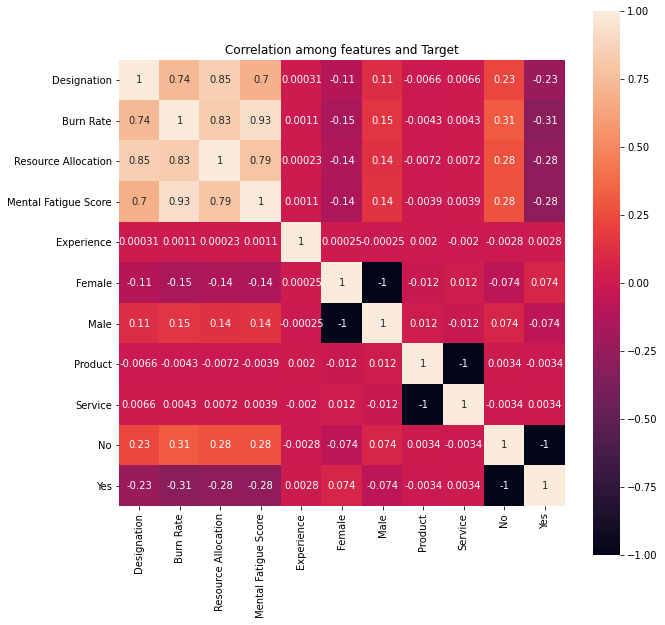

In [226]:
plt.figure(figsize=(10,10))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation among features and Target")

In [231]:
train.head(10)

,Designation,Burn Rate,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,0.16,3.0,3.80,12.17,1,0,0,1,1,0
1,1.0,0.36,2.0,5.00,12.00,0,1,0,1,0,1
2,2.0,0.49,4.0,5.80,12.67,1,0,1,0,0,1
3,1.0,0.20,1.0,2.60,12.00,0,1,0,1,0,1
4,3.0,0.52,7.0,6.90,12.33,1,0,0,1,1,0
5,2.0,0.29,4.0,3.60,12.00,0,1,1,0,0,1
6,3.0,0.62,6.0,7.90,12.83,1,0,0,1,1,0
7,2.0,0.33,4.0,4.40,12.08,1,0,0,1,0,1
8,3.0,0.56,6.0,6.89,11.92,1,0,0,1,1,0
9,3.0,0.67,6.0,6.89,12.67,1,0,1,0,1,0


In [232]:
label = train['Burn Rate']
train = train.drop('Burn Rate',axis=1)

test_dataset.head(10)

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,2.0,5.0,7.7,11.92,1,0,0,1,1,0
1,1.0,2.0,5.2,12.25,1,0,1,0,0,1
2,1.0,3.0,5.9,12.00,0,1,1,0,0,1
3,3.0,6.0,4.6,12.75,1,0,0,1,1,0
4,2.0,5.0,6.4,12.33,1,0,1,0,1,0
5,3.0,5.0,6.5,12.17,0,1,1,0,1,0
6,2.0,3.0,4.7,12.83,1,0,0,1,0,1
7,2.0,5.0,8.5,12.75,0,1,0,1,1,0
8,2.0,5.0,7.6,12.25,0,1,1,0,0,1
9,2.0,5.0,5.7,12.50,0,1,1,0,0,1


In [233]:
# Normalization!
key_list = ['Designation','Resource Allocation','Mental Fatigue Score','Experience']
MIN_KEY = train[key_list].min()
MAX_KEY = train[key_list].max()

train[key_list] = round((train[key_list] - train[key_list].min())/(train[key_list].max() - train[key_list].min()),2)
train.head(10)

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,0.4,0.22,0.38,0.27,1,0,0,1,1,0
1,0.2,0.11,0.50,0.09,0,1,0,1,0,1
2,0.4,0.33,0.58,0.82,1,0,1,0,0,1
3,0.2,0.00,0.26,0.09,0,1,0,1,0,1
4,0.6,0.67,0.69,0.45,1,0,0,1,1,0
5,0.4,0.33,0.36,0.09,0,1,1,0,0,1
6,0.6,0.56,0.79,1.00,1,0,0,1,1,0
7,0.4,0.33,0.44,0.18,1,0,0,1,0,1
8,0.6,0.56,0.69,0.00,1,0,0,1,1,0
9,0.6,0.56,0.69,0.82,1,0,1,0,1,0


In [234]:
test_dataset[key_list] = round((test_dataset[key_list] - MIN_KEY)/(MAX_KEY - MIN_KEY),2)
test_dataset.head(10)

,Designation,Resource Allocation,Mental Fatigue Score,Experience,Female,Male,Product,Service,No,Yes
0,0.4,0.44,0.77,0.00,1,0,0,1,1,0
1,0.2,0.11,0.52,0.36,1,0,1,0,0,1
2,0.2,0.22,0.59,0.09,0,1,1,0,0,1
3,0.6,0.56,0.46,0.91,1,0,0,1,1,0
4,0.4,0.44,0.64,0.45,1,0,1,0,1,0
5,0.6,0.44,0.65,0.27,0,1,1,0,1,0
6,0.4,0.22,0.47,1.00,1,0,0,1,0,1
7,0.4,0.44,0.85,0.91,0,1,0,1,1,0
8,0.4,0.44,0.76,0.36,0,1,1,0,0,1
9,0.4,0.44,0.57,0.64,0,1,1,0,0,1


In [235]:
train = train.drop('Female',axis=1)
train = train.drop('Product',axis=1)
train = train.drop('No',axis=1)

test_dataset = test_dataset.drop('Female',axis=1)
test_dataset = test_dataset.drop('Product',axis=1)
test_dataset = test_dataset.drop('No',axis=1)

print(train.head(10))
print("##########")
print(test_dataset.head(10))

   Designation  Resource Allocation  Mental Fatigue Score  ...  Male  Service  Yes
0          0.4                 0.22                  0.38  ...     0        1    0
1          0.2                 0.11                  0.50  ...     1        1    1
2          0.4                 0.33                  0.58  ...     0        0    1
3          0.2                 0.00                  0.26  ...     1        1    1
4          0.6                 0.67                  0.69  ...     0        1    0
5          0.4                 0.33                  0.36  ...     1        0    1
6          0.6                 0.56                  0.79  ...     0        1    0
7          0.4                 0.33                  0.44  ...     0        1    1
8          0.6                 0.56                  0.69  ...     0        1    0
9          0.6                 0.56                  0.69  ...     0        0    0

[10 rows x 7 columns]
##########
   Designation  Resource Allocation  Mental Fatigue S

In [237]:
train.rename(columns={'Male':'Gender','Service':'Company Type','Yes':'WFH Setup'}, inplace=True)
test_dataset.rename(columns={'Male':'Gender','Service':'Company Type','Yes':'WFH Setup'}, inplace=True)

<b>SPLIT NOW!</b>

In [238]:
train_data,validation_data,train_label,validation_label = train_test_split(train,label,test_size=0.2,random_state=0)

In [239]:
# Create Linear Regression!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm

model_linear_baseline = LinearRegression()
model_linear_baseline.fit(train_data,train_label)

r2_score(validation_label,model_linear_baseline.predict(validation_data))

0.896508350290436

In [240]:
model_svr_baseline = svm.SVR()

model_svr_baseline.fit(train_data,train_label)
r2_score(validation_label,model_svr_baseline.predict(validation_data))

0.8927140310491011

In [241]:
# Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Ridge
model_l2_baseline = Ridge()

model_l2_baseline.fit(train_data,train_label)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [242]:
print(r2_score(validation_label,model_l2_baseline.predict(validation_data)))

0.8965045675299814


In [243]:
# Lasso

model_l1_baseline = Lasso()
model_l1_baseline.fit(train_data,train_label)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [244]:
r2_score(validation_label,model_l1_baseline.predict(validation_data))

-0.0002124134520677945

In [245]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [247]:
clf_linear_reg = LinearRegression()

fit_intercept=[True,False]
normalize = [True,False]
copy_X = [True,False]

gride = dict(fit_intercept = fit_intercept,normalize = normalize, copy_X = copy_X)
grid_clf = GridSearchCV(clf_linear_reg, param_grid = gride, cv=5, scoring='r2', return_train_score=False, n_jobs=-1)

grid_clf.fit(train, label)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [250]:
print(grid_clf.cv_results_['params'][0])
print(grid_clf.cv_results_['mean_test_score'][0])

grid_mean_scores = grid_clf.cv_results_['mean_test_score']
print(grid_mean_scores)

print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.8961572475745037
[0.89615725 0.89615725 0.8903555  0.8903555  0.89615725 0.89615725
 0.8903555  0.8903555 ]
0.8961572475745037
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [251]:
# Final model!

clf_ridge_reg = Ridge()

In [252]:
alpha = [1.0,2.0,0.5,0.2,0.1]
fit_intercept = [True,False]
normalize = [True,False]
copy_X = [True,False]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

gride = dict(alpha=alpha,fit_intercept=fit_intercept,normalize=normalize,copy_X=copy_X,solver=solver)
grid_clf = GridSearchCV(clf_ridge_reg, param_grid = gride, cv=5, scoring='r2', return_train_score=False, n_jobs=-1)
grid_clf.fit(train, label)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1.0, 2.0, 0.5, 0.2, 0.1],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [253]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

0.8961658951142362
{'alpha': 0.2, 'copy_X': False, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}
Ridge(alpha=0.2, copy_X=False, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sag', tol=0.001)


In [254]:
actual_model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='sag', tol=0.001)

In [255]:
actual_model.fit(train,label)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sag', tol=0.001)

In [256]:
print(train.shape, label.shape)

(21626, 7) (21626,)


In [259]:
import csv

test_prediction = actual_model.predict(test_dataset)

with open('result.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee ID", "Burn Rate"])
    for i in range(test_dataset.shape[0]):
        if(test_prediction[i]<0):
            writer.writerow([Test_Employee_ID[i],round(0.00,3)])
        else:
            writer.writerow([Test_Employee_ID[i],round(test_prediction[i],3)])

Just this, thank you!